In [1]:
import pandas as pd
from pathlib import Path

# Path where CSV files exist
RAW = Path("./data_raw")   # change to "." if files in same folder

qos = pd.read_csv(RAW/"network_qos.csv")
usage = pd.read_csv(RAW/"usage.csv")
revenue = pd.read_csv(RAW/"revenue.csv")
complaints = pd.read_csv(RAW/"complaints.csv")

# Merge datasets
df = (qos
      .merge(usage, on="region", how="left")
      .merge(revenue, on="region", how="left")
      .merge(complaints, on="region", how="left"))

# Handle missing values
df.fillna({
    "signal_strength": df["signal_strength"].mean(),
    "latency_ms": df["latency_ms"].mean(),
    "throughput_mbps": df["throughput_mbps"].mean(),
    "complaints": 0
}, inplace=True)

# Create outputs folder and save
OUT = Path("outputs")
OUT.mkdir(exist_ok=True)

df.to_csv(OUT/"network_master.csv", index=False)

print("✅ Clean dataset saved successfully")
df.head()

✅ Clean dataset saved successfully


,region,signal_strength,latency_ms,throughput_mbps,outages,data_gb,call_minutes,dropped_calls,ARPU,customer_count,complaints,month
0,Delhi,-70,25,35,2,250,300000,100,320,56000,110,Aug
1,Mumbai,-65,20,42,1,270,290000,90,400,64000,95,Aug
2,Chennai,-75,28,32,3,220,270000,120,280,49000,140,Aug
3,Kolkata,-72,30,30,2,180,260000,130,250,45000,150,Aug
4,Hyderabad,-68,22,40,1,260,275000,110,380,51000,100,Aug


In [2]:
from pathlib import Path
print(Path("outputs/network_master.csv").exists())

True


In [3]:
import pandas as pd
df = pd.read_csv("outputs/network_master.csv")
print(df.describe())


       signal_strength  latency_ms  throughput_mbps  outages     data_gb  \
count         5.000000    5.000000         5.000000  5.00000    5.000000   
mean        -70.000000   25.000000        35.800000  1.80000  236.000000   
std           3.807887    4.123106         5.118594  0.83666   36.469165   
min         -75.000000   20.000000        30.000000  1.00000  180.000000   
25%         -72.000000   22.000000        32.000000  1.00000  220.000000   
50%         -70.000000   25.000000        35.000000  2.00000  250.000000   
75%         -68.000000   28.000000        40.000000  2.00000  260.000000   
max         -65.000000   30.000000        42.000000  3.00000  270.000000   

        call_minutes  dropped_calls        ARPU  customer_count  complaints  
count       5.000000       5.000000    5.000000        5.000000    5.000000  
mean   279000.000000     110.000000  326.000000    53000.000000  119.000000  
std     15968.719423      15.811388   63.874878     7314.369419   24.596748  
min

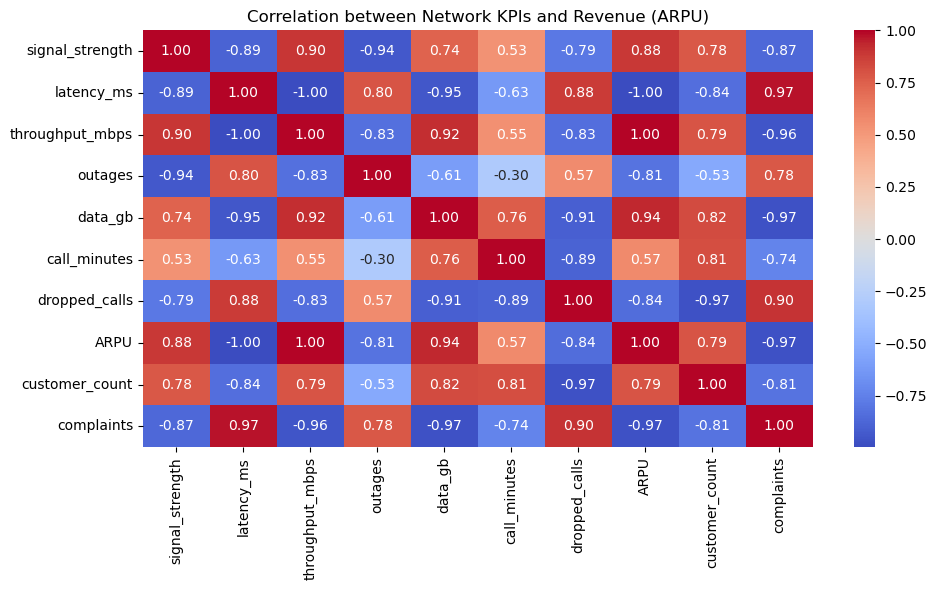

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load cleaned dataset
df = pd.read_csv("outputs/network_master.csv")

# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Network KPIs and Revenue (ARPU)")
plt.tight_layout()
plt.show()


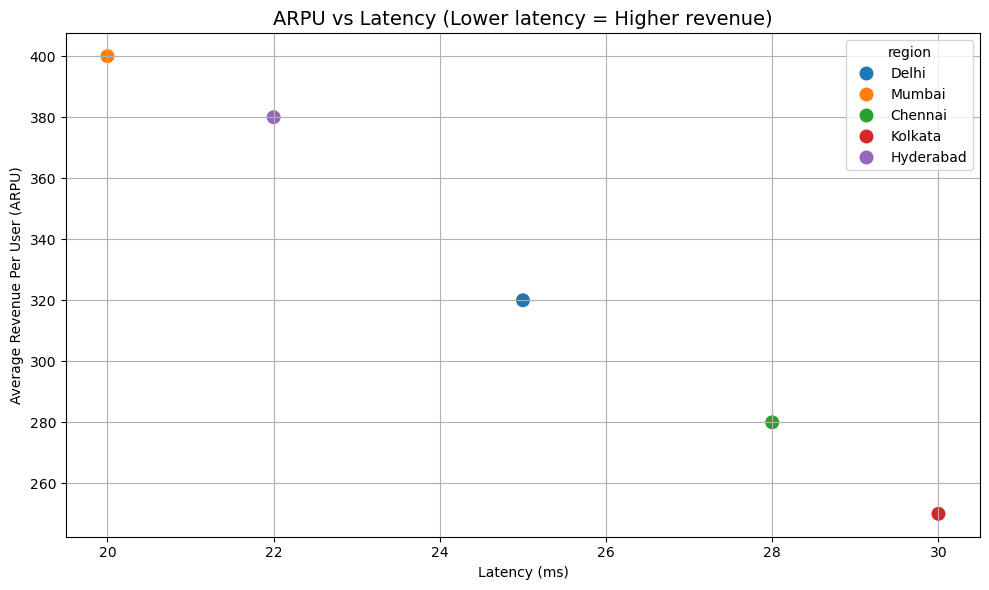

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("outputs/network_master.csv")

plt.figure(figsize=(10,6))

sns.scatterplot(
    x="latency_ms",
    y="ARPU",
    data=df,
    hue="region",
    s=120
)

plt.title("ARPU vs Latency (Lower latency = Higher revenue)", fontsize=14)
plt.xlabel("Latency (ms)")
plt.ylabel("Average Revenue Per User (ARPU)")
plt.grid(True)
plt.tight_layout()
plt.show()


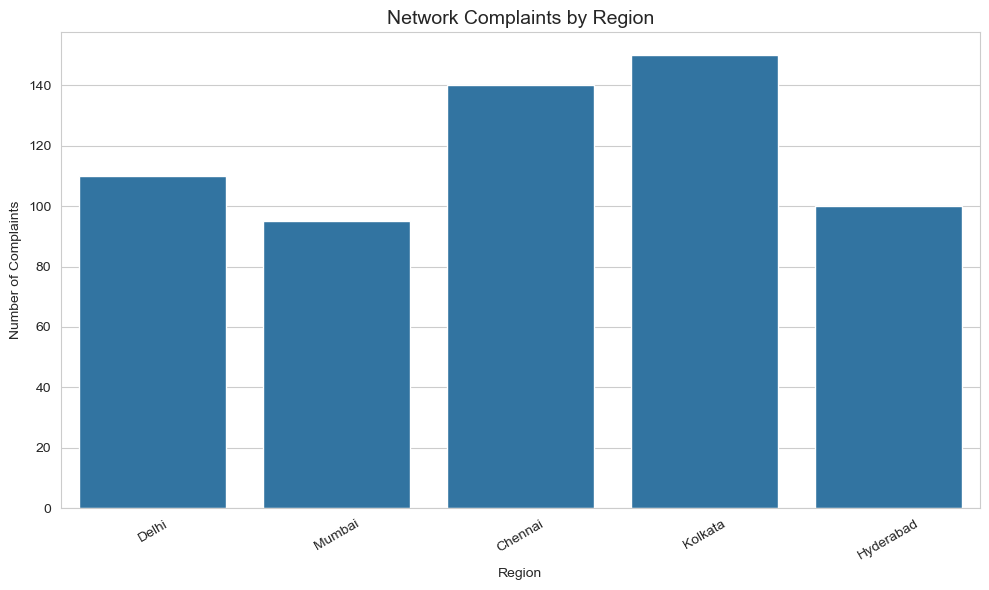

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("outputs/network_master.csv")

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.barplot(x="region", y="complaints", data=df)

plt.title("Network Complaints by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# load dataset (correct path)
df = pd.read_csv("outputs/network_master.csv")

# features and target
X = df[["latency_ms", "throughput_mbps", "complaints", "data_gb", "outages"]]
y = df["ARPU"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Linear Regression ----
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("📊 Linear Regression Results")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


📊 Linear Regression Results
R² Score: -25.699353776885893
MAE: 51.41069589970323
